In [190]:
import pandas as pd #for working with datasets
import numpy as np  #for working with numerical data
import seaborn as sns; sns.set() #for plotting nice graphic plots
import math
import matplotlib.pyplot as plt
import networkx as nx

In [191]:
#read raw csv data from file and consider the ts_start cloumn as a datetime column
#cdr_raw would be our dataset which is a Pandas object (dataframe)
cdr_raw = pd.read_csv('d4d/d4d_filtered_syntetic.csv', sep= ";", parse_dates=['ts'])
#The type of the object
print(type(cdr_raw))

<class 'pandas.core.frame.DataFrame'>


In [192]:
#we represent some records from start of the file
cdr_raw.head()

,uid,ts,arr_id
0,2356,2015-03-02 20:39:00,13
1,2356,2015-03-02 20:56:00,20
2,2356,2015-03-02 20:46:00,13
3,2356,2015-03-02 20:34:00,20
4,2356,2015-03-02 12:20:00,15


In [193]:
#we represent some records from end of the file
cdr_raw.tail()

,uid,ts,arr_id
1868236,3199,2015-03-06 15:44:00,7
1868237,3199,2015-03-13 17:21:00,7
1868238,3199,2015-03-13 17:47:00,5
1868239,3199,2015-03-24 17:28:00,6
1868240,3199,2015-03-30 14:27:00,5


In [194]:
def checkHour(h):
    if (0 <= h <= 6):
        return "t1" #Night
    elif (7 <= h <= 17):
        return "t2" #Working hours
    else:
        return "t3" #Evening

In [195]:
#to build our matrix we need to add two other columns to the data (weekday and hour in week), like the exam of VA.
#getting the weekday is easy, just check this for our cdr_raw:     cdr_raw["ts_start"].dt.weekday
#or this cdr_raw["ts_start"].dt.hour
cdr_raw['weekday'] = cdr_raw['ts'].apply(lambda x: x.weekday())
cdr_raw['hour'] = cdr_raw['ts'].apply(lambda x: x.hour)
cdr_raw['t'] = cdr_raw['ts'].apply(lambda x: checkHour(x.hour))  # adds t1, t2 or t3 to data
cdr_raw['weekno'] = cdr_raw['ts'].apply(lambda x: x.week)  # adds the week number in the year

In [196]:
#Again, we represent some records from start of the file. Now the two columns are added
cdr_raw.head()

,uid,ts,arr_id,weekday,hour,t,weekno
0,2356,2015-03-02 20:39:00,13,0,20,t3,10
1,2356,2015-03-02 20:56:00,20,0,20,t3,10
2,2356,2015-03-02 20:46:00,13,0,20,t3,10
3,2356,2015-03-02 20:34:00,20,0,20,t3,10
4,2356,2015-03-02 12:20:00,15,0,12,t2,10


In [197]:
cdr_raw.tail()

,uid,ts,arr_id,weekday,hour,t,weekno
1868236,3199,2015-03-06 15:44:00,7,4,15,t2,10
1868237,3199,2015-03-13 17:21:00,7,4,17,t2,11
1868238,3199,2015-03-13 17:47:00,5,4,17,t2,11
1868239,3199,2015-03-24 17:28:00,6,1,17,t2,13
1868240,3199,2015-03-30 14:27:00,5,0,14,t2,14


In [198]:
#We can get a description of our data based on each column
cdr_raw.describe()

,uid,arr_id,weekday,hour,weekno
count,1.868241e+06,1.868241e+06,1.868241e+06,1.868241e+06,1.868241e+06
mean,2.410953e+03,1.386045e+01,2.939533e+00,1.511019e+01,1.157396e+01
std,1.412632e+03,2.421127e+01,2.079967e+00,6.336151e+00,1.329658e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
25%,1.203000e+03,3.000000e+00,1.000000e+00,1.200000e+01,1.000000e+01
50%,2.406000e+03,5.000000e+00,3.000000e+00,1.600000e+01,1.200000e+01
75%,3.616000e+03,9.000000e+00,5.000000e+00,2.000000e+01,1.300000e+01
max,4.896000e+03,1.230000e+02,6.000000e+00,2.300000e+01,1.400000e+01


In [199]:
#How many unique users are there in our dataset?
len(cdr_raw.uid.unique())  #cdr_raw['id_chiamante']

4897

In [200]:
#How many unique start cells are there in our dataset?
len(cdr_raw.arr_id.unique())

123

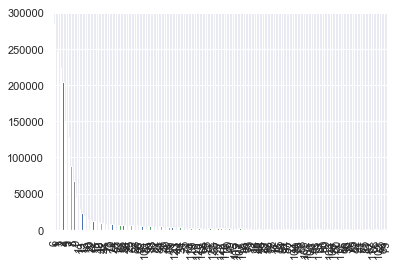

In [201]:
#Histogram of data for each start cell
cdr_raw['arr_id'].value_counts().plot(kind='bar')

In [202]:
#Now we want to build another data frame from our cdr_raw and call it cdr_matrix
#Using pivot_table
cdr_matrix = cdr_raw.pivot_table(index=cdr_raw["hour"],columns=cdr_raw["weekday"],aggfunc=len)

In [214]:
#The table is indexed based on "hour" and columned on weekdays (namely 0,1,2,3,4,5,6) and
#aggregated based on len, which means we get the length of each dimension. Actually, it means we get the count
#The aggregated data are for each of the columns of cdr_raw and are duplicate
cdr_matrix.head()

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,17573,20299,15939,12090,12867,12087,14060
1,9686,14494,6660,5860,6156,6773,7730
2,3771,7259,1728,2009,1944,2050,2973
3,1423,3287,647,622,683,537,861
4,717,1339,282,285,275,296,460


In [204]:
#To remove duplicates, we select just one column. We can choose any column
cdr_matrix = cdr_matrix["uid"]

In [213]:
cdr_matrix.head()

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,17573,20299,15939,12090,12867,12087,14060
1,9686,14494,6660,5860,6156,6773,7730
2,3771,7259,1728,2009,1944,2050,2973
3,1423,3287,647,622,683,537,861
4,717,1339,282,285,275,296,460


In [206]:
#Now, this is the matrix and we want to draw heatmap for this.
#This matrix is the heatmap of all weeks, not week by week like the paper. Getting for every week is straightforward.
cdr_matrix = cdr_matrix.fillna(0)

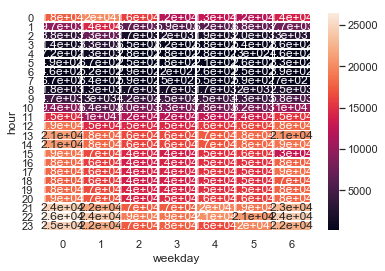

In [207]:
#Now, draw heatmap using sns
#more infor on : https://seaborn.pydata.org/generated/seaborn.heatmap.html
ax = sns.heatmap(cdr_matrix, annot=True, linewidths=.5, xticklabels=1, yticklabels=1)

In [21]:
#Grouping with weeks, so that we can have a feature (such as heatmap or OD graph) for each week

In [208]:
cdr_raw['weekno'].unique()

array([10, 14, 11, 13, 12,  9])

In [209]:
grouped= cdr_raw.groupby('weekno')

In [210]:
grouped.groups.keys()

dict_keys([9, 10, 11, 12, 13, 14])

In [215]:
#dataframe which has the data of the specified week
grouped.get_group(14).head()

,uid,ts,arr_id,weekday,hour,t,weekno
5,2356,2015-03-31 11:58:00,11,1,11,t2,14
6,2356,2015-03-31 12:29:00,15,1,12,t2,14
59,2356,2015-03-30 13:42:00,15,0,13,t2,14
60,2356,2015-03-31 23:13:00,19,1,23,t3,14
65,2356,2015-03-31 17:43:00,13,1,17,t2,14


In [216]:
numberOfWeeks = len(grouped.groups.keys()) #5
NrCols = 3 # We want to have 3 graphs in each row.
NrRows = math.ceil(numberOfWeeks/NrCols)

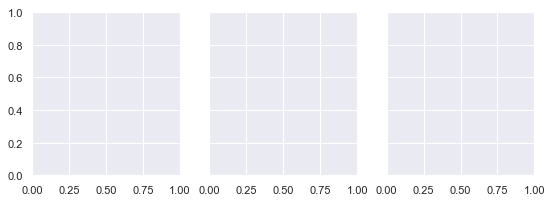

In [217]:
from matplotlib.figure import Figure
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

In [24]:
# The next two cells are just for testing how to build matrix and heatmap

In [219]:
cdr_raw.groupby(['weekday','t']).count()['arr_id'].unstack().transpose()

weekday,0,1,2,3,4,5,6
t,,,,,,,
t1,34128,47870,25800,21247,22397,22259,26801
t2,148237,121104,116444,117176,123498,127725,141952
t3,129940,117217,96264,96934,102304,106419,122525


In [222]:
cdr_matrixT = cdr_raw.groupby(['weekday', 't']).count()['arr_id'].unstack().transpose()

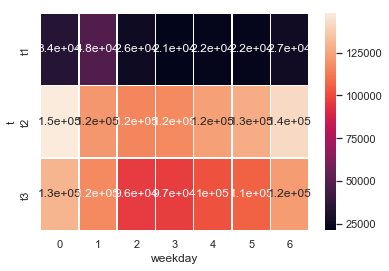

In [223]:
ax = sns.heatmap(cdr_matrixT, annot=True, linewidths=.5, xticklabels=1, yticklabels=1)

In [252]:
# Now we are going to build a heatmap for each week
# This is for all users

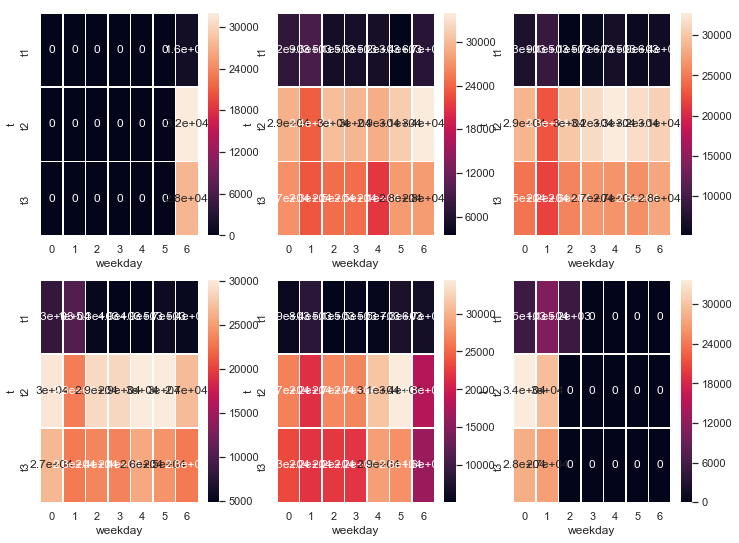

In [257]:
baseNumber = NrRows * 100 + NrCols * 10 + 1
plt.figure(figsize=(12,9))
i = 0
for weekNumber in grouped.groups.keys():
    #print (weekNumber)
    #print(grouped.groups[weekNumber])
    cdr_matrixT = grouped.get_group(weekNumber).groupby(['weekday', 't']).count()['arr_id'].unstack().transpose()
    cdr_matrixT = cdr_matrixT.fillna(0.0)
    #print(list(cdr_matrixT.columns))
    
    #checking for col differences
    col_diff = set(range(0,7)) - set(cdr_matrixT.columns) #contains the missing columns
    for col in col_diff:
        #print (col) #the missing column
        cdr_matrixT[col] = 0.0 #add the missing column with 0.0 for all rows
    # When we add the missing col, it is appended to the end, so we need to sort the names of the columns
    cdr_matrixT = cdr_matrixT[sorted(cdr_matrixT.columns)]
    
    #checking for row differences
    row_diff = {'t1', 't2', 't3'} - set(cdr_matrixT.index.values) #contains the missing rows
    for row in row_diff:
        #print (row) #the missing row
        cdr_matrixT.loc[row] = 0.0 #add the missing row with 0.0 for all columns
    # When we add the missing col, it is appended to the end, so we need to sort the names of the rows
    cdr_matrixT.sort_index(inplace=True)
    
    #print(cdr_matrixT.loc['t3'])

    sns.heatmap(cdr_matrixT, annot=True, linewidths=.5, xticklabels=1, yticklabels=1, ax=plt.subplot(baseNumber + i))
    i += 1

plt.show()

In [254]:
#HeatMap for a specific User:
uid = 312

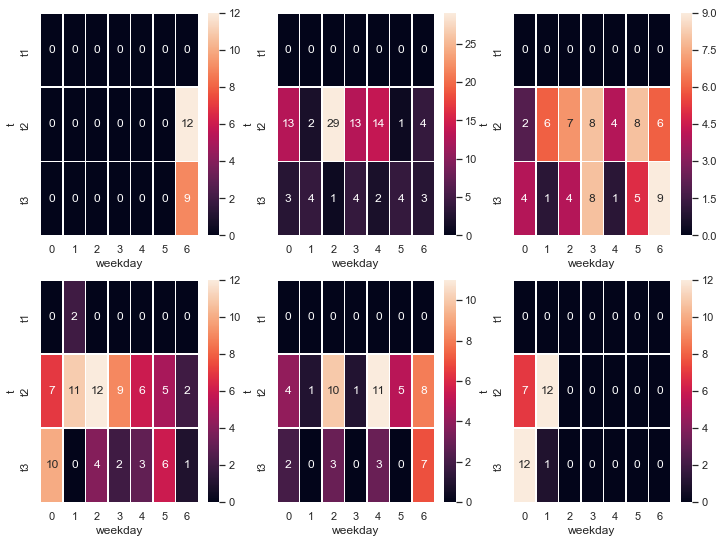

In [256]:
baseNumber = NrRows * 100 + NrCols * 10 + 1
plt.figure(figsize=(12,9))
i = 0
for weekNumber in grouped.groups.keys():
    #print (weekNumber)
    #print(grouped.groups[weekNumber])
    cdr_matrixT = grouped.get_group(weekNumber).groupby(['uid','weekday', 't']).count()['arr_id'].loc[uid].unstack().transpose()
    cdr_matrixT = cdr_matrixT.fillna(0.0)
    #print(list(cdr_matrixT.columns))
    
    #checking for col differences
    col_diff = set(range(0,7)) - set(cdr_matrixT.columns) #contains the missing columns
    for col in col_diff:
        #print (col) #the missing column
        cdr_matrixT[col] = 0.0 #add the missing column with 0.0 for all rows
    # When we add the missing col, it is appended to the end, so we need to sort the names of the columns
    cdr_matrixT = cdr_matrixT[sorted(cdr_matrixT.columns)]
    
    #checking for row differences
    row_diff = {'t1', 't2', 't3'} - set(cdr_matrixT.index.values) #contains the missing rows
    for row in row_diff:
        #print (row) #the missing row
        cdr_matrixT.loc[row] = 0.0 #add the missing row with 0.0 for all columns
    # When we add the missing col, it is appended to the end, so we need to sort the names of the rows
    cdr_matrixT.sort_index(inplace=True)
    
    #print(cdr_matrixT.loc['t3'])

    sns.heatmap(cdr_matrixT, annot=True, linewidths=.5, xticklabels=1, yticklabels=1, ax=plt.subplot(baseNumber + i))
    i += 1


plt.show()

In [258]:
import folium
import os
import json

In [259]:
sen_states = os.path.join('data', 'sen.geojson')

geo_json_data = json.load(open(sen_states))

In [260]:
arrHeatDict = cdr_raw['arr_id'].value_counts().to_dict()
minVal = arrHeatDict[min(arrHeatDict, key=arrHeatDict.get)]
maxVal = arrHeatDict[max(arrHeatDict, key=arrHeatDict.get)]


In [261]:
from branca.colormap import linear

colormap = linear.YlGn_09.scale(
    minVal,
    maxVal)

print(colormap(286018))

colormap

#004529


In [262]:
color_dict = {key: colormap(arrHeatDict[key]) for key in arrHeatDict.keys()}

In [263]:
m = folium.Map([14.475, -14.452], zoom_start=7)
folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': color_dict[feature['properties']['arr_id']],
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 1.0,
    }
).add_to(m)
m